<a href="https://colab.research.google.com/github/cyberanalyst268/Data-Science-and-Decision-Making/blob/main/Agrotech-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import scipy.stats as st

from sklearn.metrics import auc
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import Grouper
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [2]:
# Load Agrotech data from the same directory( for simplicity ofcourse.)  #This will only run if you have the Data.xlsx file in the same folder via upload etc.
data = pd.read_excel(r'Data.xlsx',parse_dates=True,sheet_name=None)


In [3]:
# display keys of data
data.keys()

dict_keys(['plants', 'flight dates', 'planting', 'weather'])

In [4]:
#rename columns in flight_dates data set
flight_dates = data['flight dates'].rename(columns={"Batch Number":"batch_number","Flight Date":"flight_date"},errors="raise")
flight_dates.head()  

,batch_number,flight_date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


In [5]:
#Edit column names to make sure they can be used for comfortably handling data
plants = data['plants'].rename(columns={"Batch Number": "batch_number", "Plant Date": "plant_date","Class":"class","Fresh Weight (g)": "fresh_weight(g)","Head Weight (g)": "head_weight(g)","Radial Diameter (mm)": "radial_diameter(mm)","Polar Diameter (mm)": "polar_diameter(mm)","Diameter Ratio": "diameter_ratio","Leaves":"leaves","Density (kg/L)": "density(kg/L)","Leaf Area (cm^2)": "leaf_area(cm^2)","Square ID": "square_id","Check Date": "check_date","Flight Date": "flight_date","Remove":"remove"},errors="raise")
plants['flight_date'] = plants['flight_date'].fillna(flight_dates['flight_date'])
plants = plants.drop(columns={"remove"})
plants

,batch_number,plant_date,class,fresh_weight(g),head_weight(g),radial_diameter(mm),polar_diameter(mm),diameter_ratio,leaves,density(kg/L),leaf_area(cm^2),square_id,check_date,flight_date
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,2020-04-30
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,2020-04-30
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,2020-07-01
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT


In [6]:
flight_dates['flight_date'] = flight_dates['flight_date'].fillna(plants['flight_date'])
flight_dates

,batch_number,flight_date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01
5,468,2020-07-01
6,469,2020-07-06
7,471,2020-07-02
8,472,2020-07-02
9,473,2020-07-02


In [7]:
#rename columns in planting dataset
planting = data['planting'].rename(columns={"Crop":"crop","Column2":"column2","Column3":"column3","Plant_Date":"plant_date","Column1":"column1","Region":"region","Column4":"column4","Planting_Batch":"planting_batch","Volume_Planted":"volume_planted","Planting_Wk":"planting_wk"},errors="raise")
planting = planting.drop(columns=['column1', 'column2','column3','column4']) 
planting.head()

,crop,plant_date,region,planting_batch,volume_planted,planting_wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0


In [8]:
# rename columns in weather dataset
weather = data['weather'].rename(columns={"Unnamed: 0":"past_date","Solar Radiation [avg]":"solar_radiation[avg]","Precipitation [sum]":"precipitation[sum]","Wind Speed [avg]":"wind_speed[avg]","Wind Speed [max]":"wind_speed[max]","Battery Voltage [last]":"battery_voltage[last]","Leaf Wetness [time]":"leaf_wetness[time]","Air Temperature [avg]":"air_temperature[avg]","Air Temperature [max]":"air_temperature[max]","Air Temperature [min]":"air_temperature[min]","Relative Humidity [avg]":"relative_humidity[avg]","Dew Point [avg]":"dew_point[avg]","Dew Point [min]":"dew_point[min]","ET0 [result]":"eto[result]"},errors="raise")
#weather = weather.fillna(1)
#weather = weather['plant_date'].map(dt.datetime.toordinal)
#pd.to_datetime(weather['plant_date'])
weather

,past_date,solar_radiation[avg],precipitation[sum],wind_speed[avg],wind_speed[max],battery_voltage[last],leaf_wetness[time],air_temperature[avg],air_temperature[max],air_temperature[min],relative_humidity[avg],dew_point[avg],dew_point[min],eto[result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


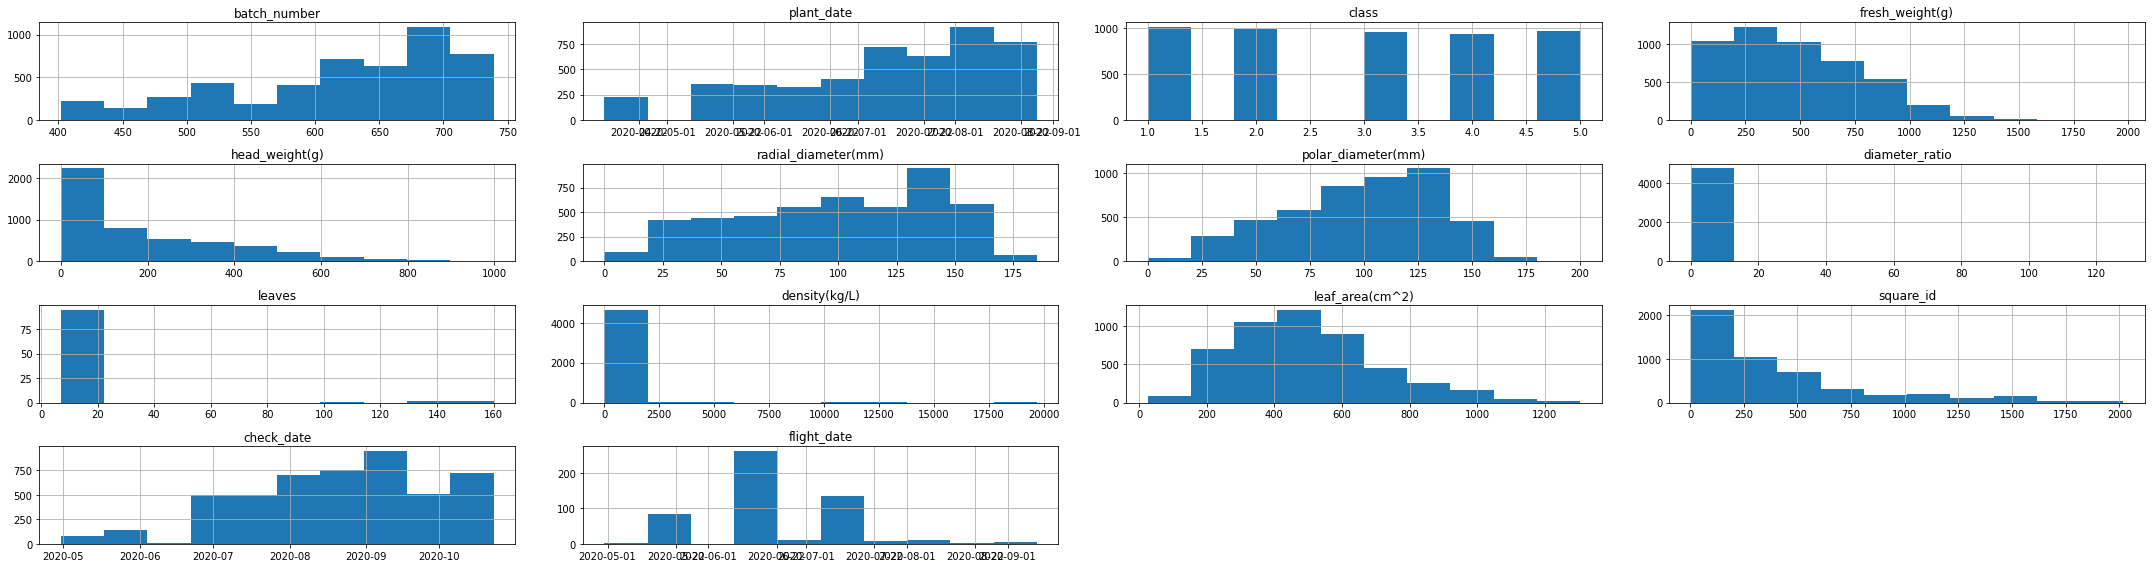

In [9]:
#plot Histogram for Plants Dataset
plants.hist(figsize=(30,8))
plt.tight_layout()
plt.savefig('plantsdata.jpeg')
plt.show()

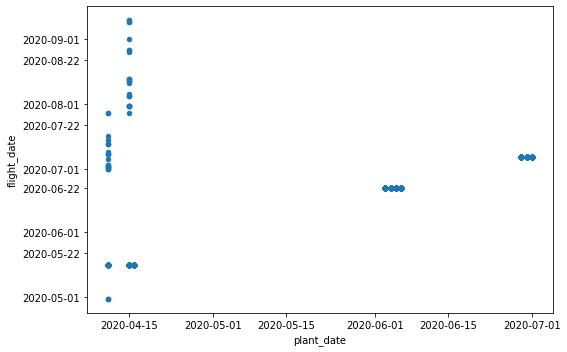

In [10]:
#plot scatterplot for plants dataset focusing plant_date and flight_date
plants.plot.scatter('plant_date','flight_date',figsize=(8,5))
plt.tight_layout()
plt.savefig('plantsflight.jpeg')
plt.show()

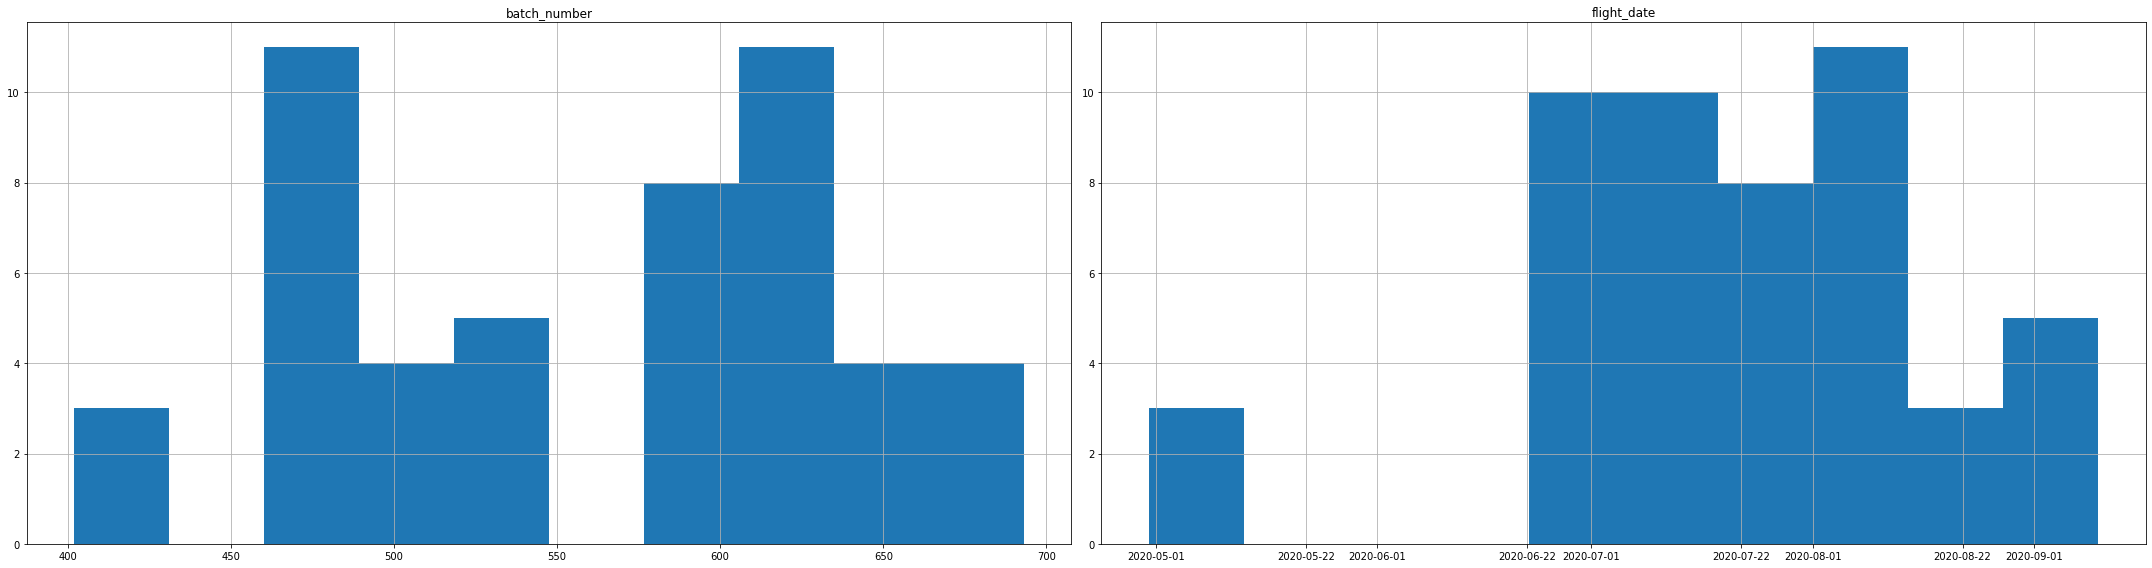

In [11]:
#Plot Histogram of flight_dates
_ = flight_dates.hist(figsize=(30,8))
plt.tight_layout()
plt.savefig('flightdata.jpeg')
plt.show()

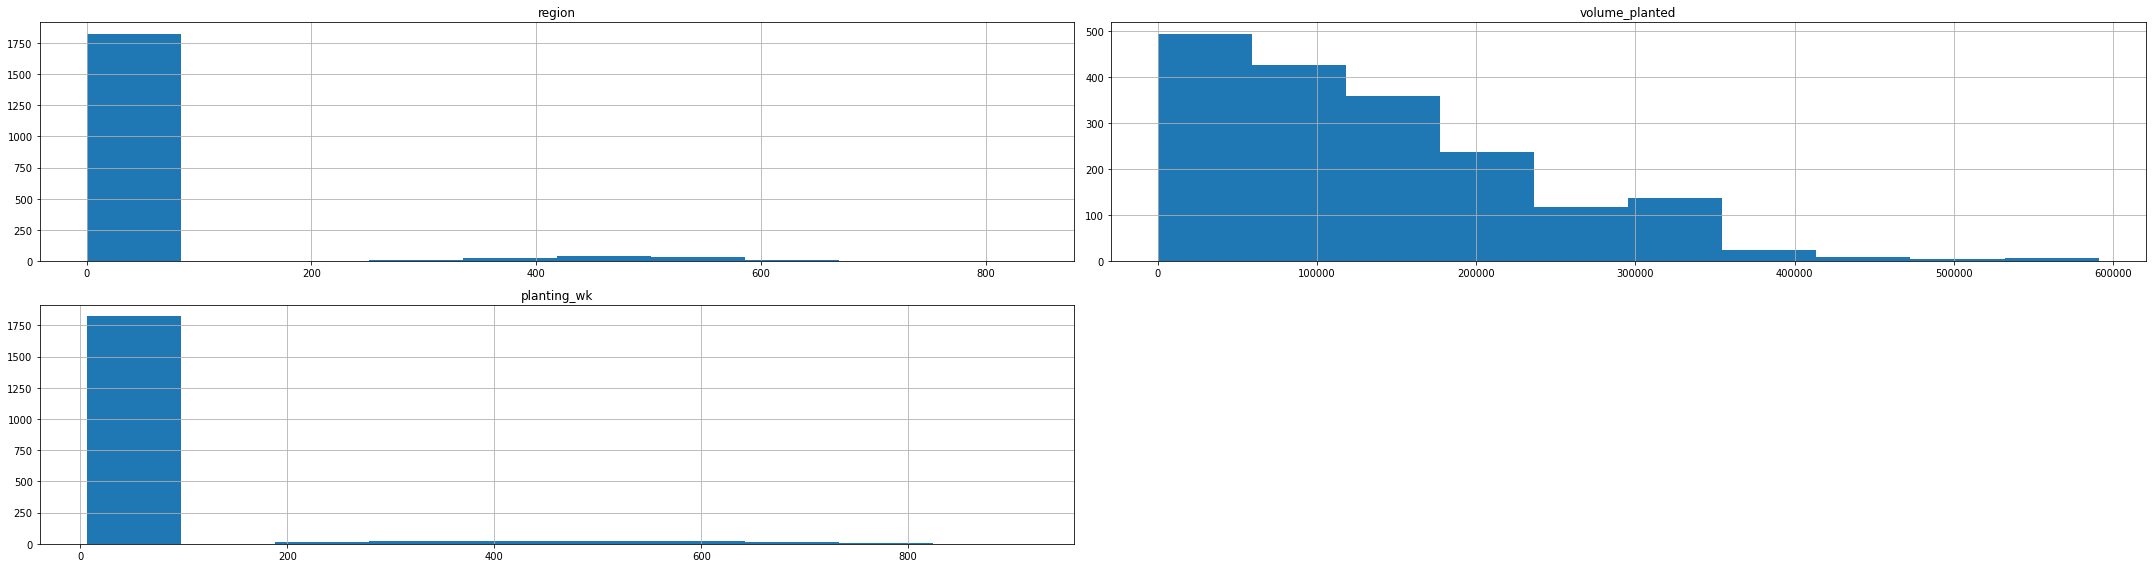

In [12]:
#plot histogram for planting dataset
_ = planting.hist(figsize=(30,8))
plt.tight_layout()
plt.savefig('plantingdata.jpeg')
plt.show()

In [13]:
#Convert weather data into features.
weather_index = weather.keys()
plants_index = plants.keys()
weather_index,plants_index


(Index(['past_date', 'solar_radiation[avg]', 'precipitation[sum]',
        'wind_speed[avg]', 'wind_speed[max]', 'battery_voltage[last]',
        'leaf_wetness[time]', 'air_temperature[avg]', 'air_temperature[max]',
        'air_temperature[min]', 'relative_humidity[avg]', 'dew_point[avg]',
        'dew_point[min]', 'eto[result]'],
       dtype='object'),
 Index(['batch_number', 'plant_date', 'class', 'fresh_weight(g)',
        'head_weight(g)', 'radial_diameter(mm)', 'polar_diameter(mm)',
        'diameter_ratio', 'leaves', 'density(kg/L)', 'leaf_area(cm^2)',
        'square_id', 'check_date', 'flight_date'],
       dtype='object'))

In [14]:
# Figure out how to use date-time features. Most regressors need numerical variables, so you’ll
#need to convert these to some other format. For example, you can create a variable called
#days_to_check that converts flight_date into number of days from plant_date.
pX = plants['plant_date'] #= pd.to_datetime(plants['plant_date'], format='%Y/%m/%d')
#Mapping to date time ordinal for calculations and plotting
fy = plants['flight_date'] #= pd.to_datetime(plants['flight_date'], format='%Y/%m/%d')
#Mapping to date time ordinal for calculations and plotting

days_to_check = [fy - pX]
days_to_check

[0      19 days
 1      19 days
 2      19 days
 3      81 days
 4      81 days
          ...  
 4854       NaT
 4855       NaT
 4856       NaT
 4857       NaT
 4858       NaT
 Length: 4859, dtype: timedelta64[ns]]

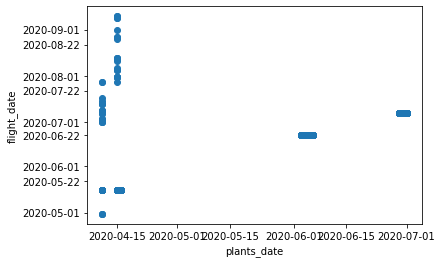

In [15]:
#Correlation between plant date and flight date
dates = matplotlib.dates.date2num(pX)
matplotlib.pyplot.plot_date(dates, fy)
plt.xlabel('plants_date')
plt.ylabel('flight_date')
plt.savefig('corrplantflight.jpeg')


In [16]:
# Merge Plants and Weather Datasets
frames =[plants,weather]
p_w = pd.concat(frames)
p_w['check_date'].head(),p_w['plant_date'].head()

(0   2020-04-30
 1   2020-04-30
 2   2020-04-30
 3   2020-04-30
 4   2020-04-30
 Name: check_date, dtype: datetime64[ns], 0   2020-04-11
 1   2020-04-11
 2   2020-04-11
 3   2020-04-11
 4   2020-04-11
 Name: plant_date, dtype: datetime64[ns])

In [17]:
# Plants and Weather Datasets
p_w

,batch_number,plant_date,class,fresh_weight(g),head_weight(g),radial_diameter(mm),polar_diameter(mm),diameter_ratio,leaves,density(kg/L),...,wind_speed[max],battery_voltage[last],leaf_wetness[time],air_temperature[avg],air_temperature[max],air_temperature[min],relative_humidity[avg],dew_point[avg],dew_point[min],eto[result]
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,7166.0,0.0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,6864.0,0.0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,6854.0,0.0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,6864.0,0.0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


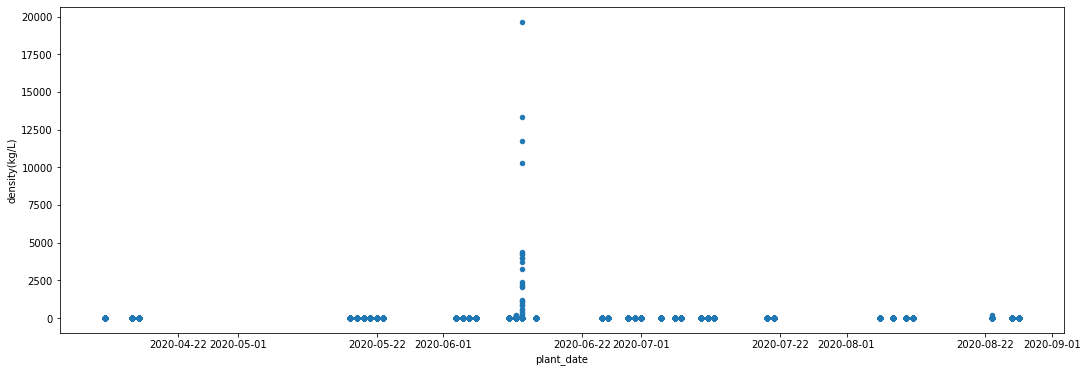

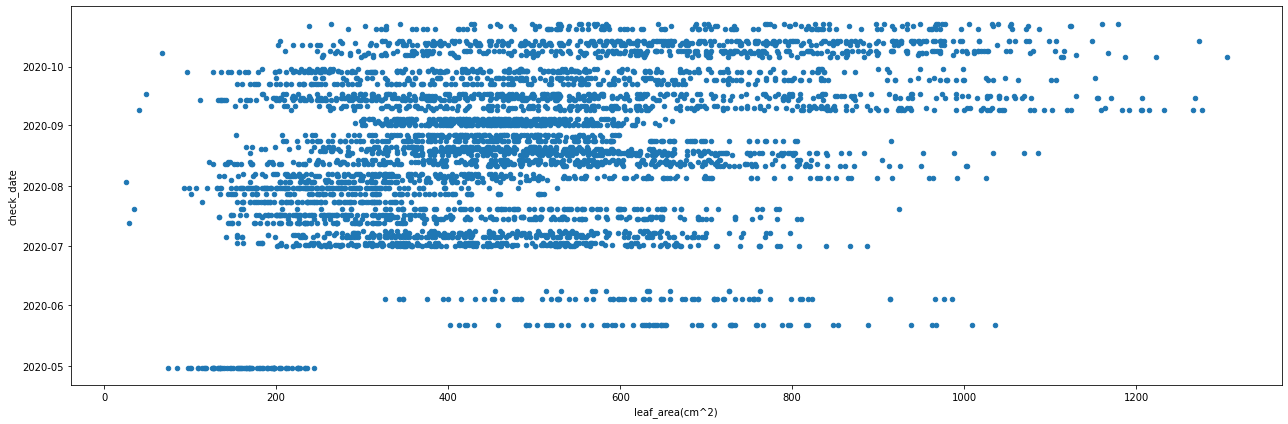

In [18]:
#Predict the size of future Lettuce
p_w.plot.scatter('plant_date','density(kg/L)',figsize=(18,6))
p_w.plot.scatter('leaf_area(cm^2)','check_date',figsize=(18,6))
plt.tight_layout()
plt.savefig('sizefuturelettuce.jpeg')
plt.show()

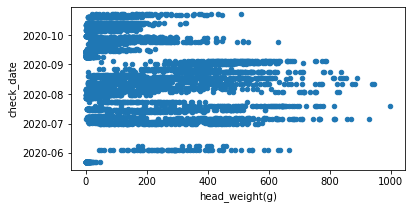

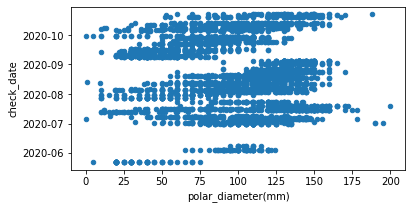

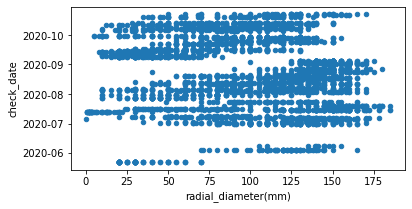

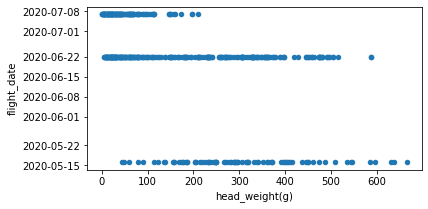

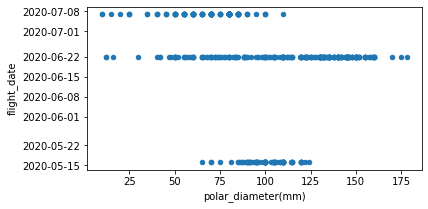

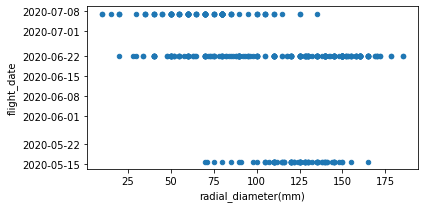

In [19]:
#simultaneously predict head weight, polar diameter, and radial diameter at the ‘Check Date’ using information about the plant at flight time and about the weather.
p_w.plot.scatter('head_weight(g)','check_date',figsize=(6,3)), p_w.plot.scatter('polar_diameter(mm)','check_date',figsize=(6,3)), p_w.plot.scatter('radial_diameter(mm)','check_date',figsize=(6,3)), p_w.plot.scatter('head_weight(g)','flight_date',figsize=(6,3)), p_w.plot.scatter('polar_diameter(mm)','flight_date',figsize=(6,3)), p_w.plot.scatter('radial_diameter(mm)','flight_date',figsize=(6,3))
plt.tight_layout()
plt.savefig('simulpredict.jpeg')
plt.show()

In [20]:
#Merge features you’ve created from the weather data with the plant dataframe so you can use them.
merged = pd.merge(plants,weather,left_on= 'plant_date', right_on= 'past_date')
#merged = merged.fillna(1)
merged

,batch_number,plant_date,class,fresh_weight(g),head_weight(g),radial_diameter(mm),polar_diameter(mm),diameter_ratio,leaves,density(kg/L),...,wind_speed[max],battery_voltage[last],leaf_wetness[time],air_temperature[avg],air_temperature[max],air_temperature[min],relative_humidity[avg],dew_point[avg],dew_point[min],eto[result]
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,4.5,6884,0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,4.5,6884,0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,...,4.5,6884,0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,4.5,6884,0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,4.5,6884,0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,...,5.1,6854,120,14.11,17.74,9.38,92.56,12.6,9.2,1.6
4681,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,...,5.1,6854,120,14.11,17.74,9.38,92.56,12.6,9.2,1.6
4682,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,...,5.1,6854,120,14.11,17.74,9.38,92.56,12.6,9.2,1.6
4683,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,...,5.1,6854,120,14.11,17.74,9.38,92.56,12.6,9.2,1.6


<function matplotlib.pyplot.show>

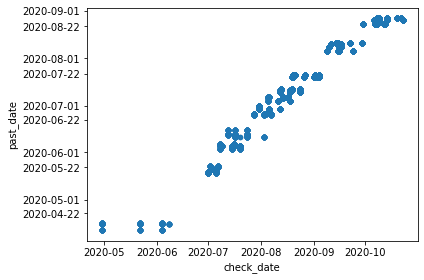

In [21]:
#plot of plant and flight dates of lettuce in the future below.
merged.plot.scatter('check_date','past_date')
plt.tight_layout()
plt.savefig('plantflightlettuce.jpeg')
plt.show

In [22]:
#Using appropriate methodology, train and measure the performance of a multi-label linear regressor (you can play with the order of the polynomial) to simultaneously predict head weight, polar diameter, and radial diameter at the ‘Check Date’ using information about the plant at flight time and about the weather.
merged.keys()


Index(['batch_number', 'plant_date', 'class', 'fresh_weight(g)',
       'head_weight(g)', 'radial_diameter(mm)', 'polar_diameter(mm)',
       'diameter_ratio', 'leaves', 'density(kg/L)', 'leaf_area(cm^2)',
       'square_id', 'check_date', 'flight_date', 'past_date',
       'solar_radiation[avg]', 'precipitation[sum]', 'wind_speed[avg]',
       'wind_speed[max]', 'battery_voltage[last]', 'leaf_wetness[time]',
       'air_temperature[avg]', 'air_temperature[max]', 'air_temperature[min]',
       'relative_humidity[avg]', 'dew_point[avg]', 'dew_point[min]',
       'eto[result]'],
      dtype='object')

In [23]:
#preparing the data for fitting
x = merged[(['head_weight(g)','polar_diameter(mm)','radial_diameter(mm)'])].astype("datetime64[ns]")
y = merged[(['check_date','plant_date','flight_date'])].astype("datetime64")
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
x.shape,y.shape


((14055, 1), (14055, 1))

In [37]:
#Fitting the data
poly_reg = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly_reg.fit_transform(x.astype("int"))
poly_reg = LinearRegression()
poly_reg.fit(poly_features, y)

LinearRegression()

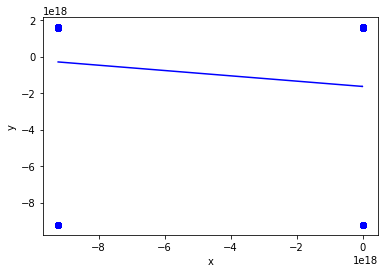

In [44]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x.astype("int"), y.astype("int"), color='blue')
    plt.plot(x.astype("int"), poly_reg.predict(poly_features), color='blue')
    #plt.title('Prediction and Actual Values (Linear Regression)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("mlr.jpeg")
    plt.show()
    return
viz_polymonial()

In [42]:
#predict
#ypred = poly_reg.predict(poly_features)

In [43]:
#The Performance of a Multi-Label Linear Regressor
#plt.figure(figsize=(10,5))
#plt.scatter(x.astype("int"),y.astype("int"),s=15)
#plt.plot(poly_features.astype("int"),ypred.astype("int"),color='b')
#plt.xlabel('Prediction',fontsize=16)
#plt.ylabel('Target',fontsize=16)
#plt.show()
#plt.savefig("mlr.jpeg")
